### **Bike Price Prediction using Linear Regression**

**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

**Import CSV as DataFrame**

In [3]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

**Get the First Five Rows of DataFrame**

In [4]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


**Get Information of DataFrame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


**Get Missing Values Drop**

In [6]:
df = df.dropna()

**Get Summary Statistics**

In [7]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


**Get Categories and Counts of Categorical Variables**

In [8]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [9]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [10]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [11]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

**Get Column Names**

In [12]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

**Get Shape of DataFrame**

In [13]:
df.shape

(626, 8)

**Get Encoding of Categorical Features**

In [14]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [15]:
df.replace({'Owner':{'1st owner':0, '2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

**Define y(dependent or label or target varaible) and X(independent or features or attribute Variable)**

In [16]:
y=df['Selling_Price']

In [17]:
y.shape

(626,)

In [18]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [19]:
X=df[['Year','Seller_Type', 'Owner', 'KM_Driven', 'Ex_Showroom_Price']]

In [20]:
X.shape

(626, 5)

In [21]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


**Get Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size =0.3, random_state =102529)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

**Get Model Train**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

**Get Model Prediction**

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_pred.shape

(188,)

In [30]:
y_pred

array([ 44593.81017623,  72556.7204031 ,  30670.51014594,  25530.15203685,
       128683.02086165,  30453.79680169,  55982.6784798 , 141660.02796822,
        69697.44203337,  23341.29138831,  47135.37329778,   7478.27183161,
        48086.69692003,  -1792.97306191,  38889.66151575,  57383.38174769,
        20371.39133311,  59097.69993848,  26407.70679123, 124722.71562376,
        43698.87265933,  53134.41399829, 112970.64557784,  69649.36903972,
        49225.07823353,  26770.26913963,  84950.74582247,  38982.64781563,
        61247.27750697,   7152.85557477,  63248.91269241,  51932.33441499,
        56178.91867683,   1479.45919616,  66991.15329711,   9340.85229552,
        24297.95472166,  49809.00090253,  76034.2985668 ,  39824.75695811,
        52695.19560502, 109539.29572253,   5718.35258452, 104132.92756842,
        34159.03571912,  38400.60366769,  31813.56663071,  67467.7293383 ,
        31453.12079129,  36778.34174722,  53005.43171658,  66204.99007721,
       140189.87957022, 1

**Get Model Evaluation**

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mean_squared_error(y_test,y_pred)

577498690.0123026

In [33]:
mean_absolute_error(y_test,y_pred)

12309.571686237347

In [34]:
r2_score(y_test, y_pred)

0.8693056484331497

**Get Visualization of Actual Vs Predicted Results**

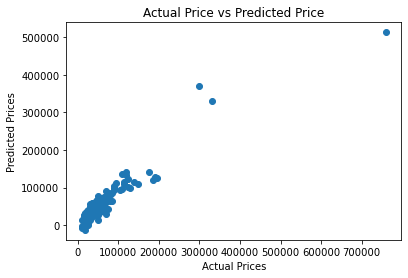

In [35]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

**Get Future Predictions**

In [36]:
df_new = df.sample(1)

In [37]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
375,Yamaha,Yamaha FZ16,60000,2016,0,0,29950,78712.0


In [38]:
df_new.shape

(1, 8)

In [39]:
X_new = df_new.drop(['Brand', 'Model', 'Selling_Price'],axis = 1)

In [40]:
y_pred_new = lr.predict(X_new)

In [41]:
y_pred_new

array([59246.27845535])